In [53]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [54]:
df=pd.read_csv('Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
297,6851-WEFYX,Male,1,Yes,No,35,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.80,3437.5,No
5090,6502-HCJTI,Male,1,Yes,No,7,Yes,Yes,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),94.70,673.1,Yes
6303,6308-CQRBU,Female,0,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,No,Electronic check,109.25,7707.7,No
6421,2999-AANRQ,Female,0,No,No,21,Yes,No,DSL,Yes,...,No,Yes,Yes,No,Two year,No,Credit card (automatic),71.05,1524.85,No
4824,3339-EAQNV,Male,1,Yes,No,72,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Credit card (automatic),97.25,7133.1,No


In [55]:
df.drop('customerID',axis='columns',inplace=True)


In [126]:
df.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [127]:
df.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [128]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [129]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [130]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,1,0,1,1,0,0,0,DSL,1,0,1,1,1,0,Two year,1,Bank transfer (automatic),52.55,NaN,0
753,0,0,0,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.25,NaN,0
936,1,0,1,1,0,1,0,DSL,1,1,1,0,1,1,Two year,0,Mailed check,80.85,NaN,0
1082,0,0,1,1,0,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.75,NaN,0
1340,1,0,1,1,0,0,0,DSL,1,1,1,1,1,0,Two year,0,Credit card (automatic),56.05,NaN,0
3331,0,0,1,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,19.85,NaN,0
3826,0,0,1,1,0,1,1,No,0,0,0,0,0,0,Two year,0,Mailed check,25.35,NaN,0
4380,1,0,1,1,0,1,0,No,0,0,0,0,0,0,Two year,0,Mailed check,20.00,NaN,0
5218,0,0,1,1,0,1,0,No,0,0,0,0,0,0,One year,1,Mailed check,19.70,NaN,0
6670,1,0,1,1,0,1,1,DSL,0,1,1,1,1,0,Two year,0,Mailed check,73.35,NaN,0


In [131]:
df.shape

(7043, 20)

In [132]:
df.iloc[488]['TotalCharges']

np.float64(nan)

In [133]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7043, 20)

In [134]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

In [135]:
df1.TotalCharges.dtypes

dtype('float64')

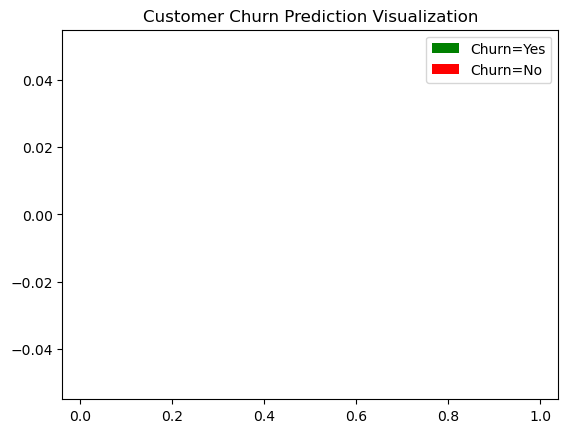

In [136]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.title('Customer Churn Prediction Visualization')
plt.legend()
plt.show()

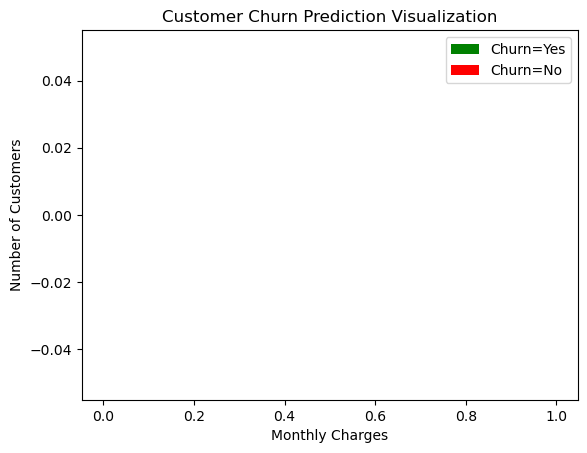

In [137]:
mc_churn_no=df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

blood_sugar_man=[113,85,90,150,149,88,93,135,80,77,82,129]
blood_sugar_woman=[67,98,89,120,133,150,84,69,89,79,120,112,100]

plt.hist([mc_churn_yes,mc_churn_no],rwidth=0.95,color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.show()

In [138]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [139]:
print_unique_col_values(df)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [140]:
df1=df.replace('No internet service','No',inplace=True)
df1=df.replace('No phone service','No',inplace=True)

In [141]:
print_unique_col_values(df)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [142]:
for col in df:
    print(f'{col}:{df[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [143]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [144]:
for col in df:
    print(f'{col}:{df[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [145]:
df['gender'] = df['gender'].replace({'Female': 1, 'Male': 0})


In [146]:
df['gender'].unique()

array([1, 0])

In [147]:
df2=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [148]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1882,0,0,1,1,29,1,0,1,0,0,...,True,False,False,True,False,False,False,False,False,True
5803,0,0,1,0,5,1,1,0,1,0,...,False,True,False,True,False,False,False,False,True,False
6770,1,0,1,1,4,1,0,0,0,0,...,False,True,False,True,False,False,False,False,False,True
2646,0,0,0,0,56,1,0,0,1,1,...,True,False,False,False,False,True,False,True,False,False


In [149]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [150]:
df2 = df2.astype({col: int for col in df2.select_dtypes('bool').columns})


In [151]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [157]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])


In [158]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3999,1,1,0,0,0.027778,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3388,1,0,1,0,0.902778,1,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.611111,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [160]:
for col in df2:
    print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.
 0.54166667]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Strea

In [161]:
x=df2.drop('Churn',axis='columns')
y=df2['Churn']

In [163]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [164]:
X_train.shape

(5634, 26)

In [165]:
X_test.shape

(1409, 26)

In [166]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5860,1,0,0,0,0.027778,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
2458,0,1,1,0,0.694444,1,1,1,0,1,...,0,1,0,0,0,1,0,1,0,0
5879,0,0,1,0,0.458333,1,0,1,1,0,...,1,0,0,0,0,1,0,0,0,1
4708,1,0,1,1,0.777778,1,0,1,1,1,...,1,0,0,0,0,1,0,1,0,0
1293,0,0,1,1,0.930556,1,1,0,1,1,...,0,1,0,0,0,1,1,0,0,0
2242,0,0,1,1,0.611111,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1444,0,0,0,1,0.569444,1,0,1,1,1,...,0,1,0,0,0,1,0,0,1,0
3269,0,0,0,0,0.902778,1,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
101,1,0,1,1,0.013889,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4191,1,0,1,0,0.875000,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0


In [167]:
len(X_train.columns)

26

In [177]:
import sys
!{sys.executable} -m pip install --upgrade tensorflow


In [183]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train, epochs=100)


                       

Epoch 1/100


C:\Users\ramya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7639 - loss: 0.4730    
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7961 - loss: 0.4279 
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7993 - loss: 0.4224 
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8053 - loss: 0.4187 
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8072 - loss: 0.4171 
Epoch 6/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8062 - loss: 0.4162 
Epoch 7/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8067 - loss: 0.4156 
Epoch 8/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8042 - loss: 0.4145 
Epoch 9/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8085 - loss: 0.4144 
Epoch 10/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8072 - loss: 0.4142 
Epoch 11/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8095 - loss: 0.4130  
Epoch 12/100
177/177 ━━━━━━━━━━━━━━━━━

In [184]:
model.evaluate(X_test,y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7991 - loss: 0.4272  


[0.4272060692310333, 0.7991483211517334]

In [185]:
yp = model.predict(X_test)
yp[:5]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([[0.2592207 ],
       [0.4044013 ],
       [0.34134796],
       [0.9068077 ],
       [0.0928181 ]], dtype=float32)

In [189]:
y_test[:10]

4213    1
5035    0
3713    1
1720    0
234     0
4558    1
40      0
3455    1
5944    1
1089    0
Name: Churn, dtype: int64

In [190]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [191]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 1, 0, 0]

In [194]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1023
           1       0.66      0.56      0.61       386

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.79      0.80      0.79      1409



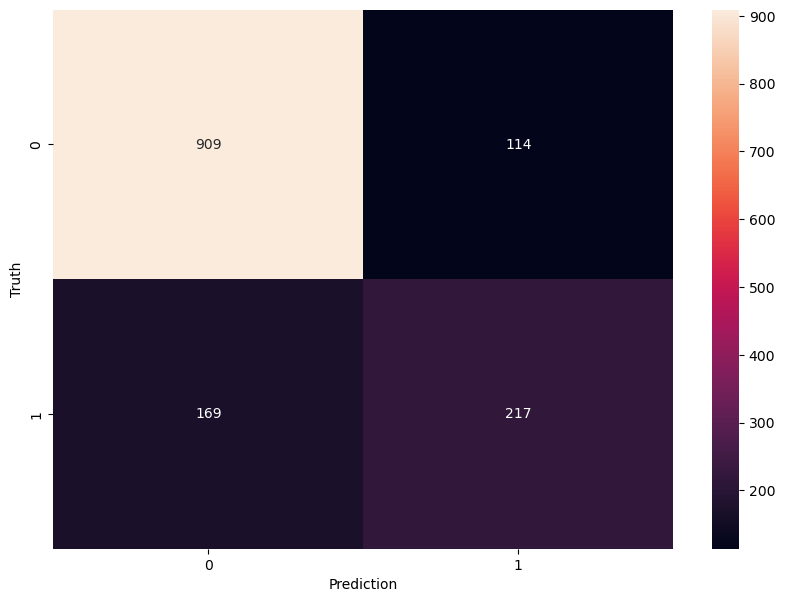

In [195]:
import seaborn as sns

# Step 1: Make confusion matrix using TensorFlow
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

# Step 2: Make a nice heatmap to see it clearly
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')  # annot=True puts numbers on cells, fmt='d' makes them integers

# Step 3: Label axes
plt.xlabel('Prediction')  # x-axis = predicted labels
plt.ylabel('Truth')       # y-axis = actual labels

# Step 4: Show the plot
plt.show()


# Accuracy

In [197]:
 round((909+217)/(909+217+169+114),2)

0.8

# Precision for 0 class i.e. Precision for customers who did not churned


In [198]:
round(909/(909+169),2)

0.84

# Precision for 1 class i.e. Precision for customers actually churned


In [200]:
round(217/(217+114),2)

0.66

# Recall for 0 class

In [201]:
round(909/(909+114),2)

0.89

In [202]:
round(217/(217+169),2)

0.56